# Cincinnati Traffic

## Topic
*What problem are you (or your stakeholder) trying to address?* 
THe issue that I will be focusing on is that of Cincinnati roads. It would seem that most says this city has a new unique arangement of road closures due to traffic collisions. If Cincinnati we looking to improve their road conditions and safety, it would be important to know where the majority of traffic collisions occur. It would also be important to know the severtiy of the accidents in these locations to know where the more serious problems are located. This project could even determine which areas are unsafe to travel depending on weather conditions. 

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*

Where in Cincinnati are the majority of fatal accidents, and what commonalities do the collisions share?

## What would an answer look like?
*What is your hypothesized answer to your question?*

I predict that the majority of wrecks will be in high trafficed areas of high speeds. Sharp bends will also have an effect on the situations. It will also be important to note the variation between weather conditions.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
*How will you use this data to answer your project question?*



 To prepare for this project, it will be necessary to collect data from reliable resources. All of the City of Cincinnati's information is collected and published online for all to access. The information collected will provide a map of the the area with ranking of dangerous roads to safe. 

 Data Sources:

 https://data.cincinnati-oh.gov/resource/rvmt-pkmq.json

 https://data.cincinnati-oh.gov/safety/Traffic-Crash-Reports-CPD-/rvmt-pkmq


In [45]:
# Start your code here

In [46]:
import sys
assert sys.version_info >= (3, 10)

import numpy as np
import pandas as pd
import os
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")



In [47]:
traffic=pd.read_csv("datasets/traffic_crash_reports.csv")

In [48]:
traffic.describe()

LATITUDE_X    LONGITUDE_X            AGE
count  105183.000000  105183.000000  105183.000000
mean       39.139677     -84.513909      37.658139
std         0.031165       0.048852      16.423981
min        39.054609     -84.756898       0.000000
25%        39.114384     -84.542479      24.000000
50%        39.135026     -84.513206      34.000000
75%        39.161079     -84.486142      50.000000
max        39.308208     -84.251150     123.000000

In [49]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105183 entries, 0 to 105182
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   LATITUDE_X                      105183 non-null  float64
 1   LONGITUDE_X                     105183 non-null  float64
 2   AGE                             105183 non-null  int64  
 3   COMMUNITY_COUNCIL_NEIGHBORHOOD  103565 non-null  object 
 4   CRASHDATE                       105183 non-null  object 
 5   CRASHLOCATION                   105183 non-null  object 
 6   DAYOFWEEK                       105183 non-null  object 
 7   GENDER                          105183 non-null  object 
 8   INJURIES                        105183 non-null  object 
 9   LIGHTCONDITIONSPRIMARY          105183 non-null  object 
 10  MANNEROFCRASH                   105183 non-null  object 
 11  ROADCONTOUR                     105183 non-null  object 
 12  ROADCLASSDESC   

In [50]:
traffic.isnull().sum()

LATITUDE_X                           0
LONGITUDE_X                          0
AGE                                  0
COMMUNITY_COUNCIL_NEIGHBORHOOD    1618
CRASHDATE                            0
CRASHLOCATION                        0
DAYOFWEEK                            0
GENDER                               0
INJURIES                             0
LIGHTCONDITIONSPRIMARY               0
MANNEROFCRASH                        0
ROADCONTOUR                          0
ROADCLASSDESC                        0
UNITTYPE                             0
TYPEOFPERSON                         0
WEATHER                              0
dtype: int64

In [51]:
trafficCrashSample=traffic.copy(deep=True)
trafficCrashSample.sample(5)

LATITUDE_X  LONGITUDE_X  AGE COMMUNITY_COUNCIL_NEIGHBORHOOD  \
97006    39.172504   -84.478080   41                  PADDOCK HILLS   
80985    39.132155   -84.510789   27           CORRYVILLE - HEIGHTS   
72188    39.104209   -84.514468   86                       DOWNTOWN   
16744    39.194517   -84.474946   64                       ROSELAWN   
101443   39.163669   -84.540680   23                      NORTHSIDE   

               CRASHDATE               CRASHLOCATION DAYOFWEEK      GENDER  \
97006     2/5/2013 12:06  02 - FOUR-WAY INTERSECTION       TUE    M - MALE   
80985   11/26/2014 21:23  02 - FOUR-WAY INTERSECTION       WED  F - FEMALE   
72188    6/22/2015 12:24    01 - NOT AN INTERSECTION       MON    M - MALE   
16744    10/7/2017 14:51    01 - NOT AN INTERSECTION       SAT    M - MALE   
101443    6/7/2013 18:50    01 - NOT AN INTERSECTION       FRI  F - FEMALE   

                             INJURIES      LIGHTCONDITIONSPRIMARY  \
97006   1 - NO INJURY / NONE REPORTED                1 - DAYLIGHT   
80985   1 - NO INJURY / NONE REPORTED  4 - DARK - LIGHTED ROADWAY   
72188   1 - NO INJURY / NONE REPORTED                1 - DAYLIGHT   
16744   1 - NO INJURY / NONE REPORTED                1 - DAYLIGHT   
101443  1 - NO INJURY / NONE REPORTED                1 - DAYLIGHT   

                        MANNEROFCRASH         ROADCONTOUR  \
97006                    2 - REAR-END     4 - CURVE GRADE   
80985                       6 - ANGLE  1 - STRAIGHT LEVEL   
72188                    2 - REAR-END  1 - STRAIGHT LEVEL   
16744   7 - SIDESWIPE, SAME DIRECTION  2 - STRAIGHT GRADE   
101443  7 - SIDESWIPE, SAME DIRECTION  1 - STRAIGHT LEVEL   

               ROADCLASSDESC                    UNITTYPE  TYPEOFPERSON  \
97006                  Ramps  06 - SPORT UTILITY VEHICLE    D - DRIVER   
80985   Major Arterial Roads               03 - MID SIZE    D - DRIVER   
72188   Major Arterial Roads                 07 - PICKUP    D - DRIVER   
16744   Minor Arterial Roads               03 - MID SIZE    D - DRIVER   
101443       Collector Roads                02 - COMPACT  O - OCCUPANT   

           WEATHER  
97006   2 - CLOUDY  
80985    1 - CLEAR  
72188    1 - CLEAR  
16744    1 - CLEAR  
101443   1 - CLEAR

In [52]:
list(trafficCrashSample.columns)

['LATITUDE_X',
 'LONGITUDE_X',
 'AGE',
 'COMMUNITY_COUNCIL_NEIGHBORHOOD',
 'CRASHDATE',
 'CRASHLOCATION',
 'DAYOFWEEK',
 'GENDER',
 'INJURIES',
 'LIGHTCONDITIONSPRIMARY',
 'MANNEROFCRASH',
 'ROADCONTOUR',
 'ROADCLASSDESC',
 'UNITTYPE',
 'TYPEOFPERSON',
 'WEATHER']

In [53]:
'''
trafficCrashSample.drop(columns=['ADDRESS_X',
 'LATITUDE_X',
 'LONGITUDE_X',
 'CPD_NEIGHBORHOOD',
 'SNA_NEIGHBORHOOD',
 'LIGHTCONDITIONSPRIMARY',
 'ROADCONDITIONSPRIMARY',
 'ROADCLASSDESC',
 'UNITTYPE'], axis=1, inplace=True)
'''
trafficCrashSample.sample(5)

LATITUDE_X  LONGITUDE_X  AGE COMMUNITY_COUNCIL_NEIGHBORHOOD  \
4553    39.202527   -84.466656   31                       HARTWELL   
10920   39.147245   -84.486234   64                       AVONDALE   
31156   39.156183   -84.602348   40                       WESTWOOD   
63883   39.146915   -84.514093   45                        CLIFTON   
33051   39.132438   -84.501507   37                     CORRYVILLE   

             CRASHDATE               CRASHLOCATION DAYOFWEEK      GENDER  \
4553   9/26/2018 18:15    01 - NOT AN INTERSECTION       WED    M - MALE   
10920  6/21/2018 16:55    01 - NOT AN INTERSECTION       THU  F - FEMALE   
31156   5/3/2017 18:10  02 - FOUR-WAY INTERSECTION       WED    M - MALE   
63883  1/26/2016 14:23         03 - T-INTERSECTION       TUE    M - MALE   
33051   5/2/2017 13:05  02 - FOUR-WAY INTERSECTION       TUE  F - FEMALE   

                            INJURIES LIGHTCONDITIONSPRIMARY  \
4553   1 - NO INJURY / NONE REPORTED           1 - DAYLIGHT   
10920  1 - NO INJURY / NONE REPORTED           1 - DAYLIGHT   
31156  1 - NO INJURY / NONE REPORTED           1 - DAYLIGHT   
63883  1 - NO INJURY / NONE REPORTED           1 - DAYLIGHT   
33051                   2 - POSSIBLE           1 - DAYLIGHT   

                                           MANNEROFCRASH         ROADCONTOUR  \
4553   1 - NOT COLLISION BETWEEN TWO MOTOR VEHICLES I...     4 - CURVE GRADE   
10920                      7 - SIDESWIPE, SAME DIRECTION  1 - STRAIGHT LEVEL   
31156                                          6 - ANGLE  1 - STRAIGHT LEVEL   
63883                                        5 - BACKING     4 - CURVE GRADE   
33051                                          6 - ANGLE  1 - STRAIGHT LEVEL   

              ROADCLASSDESC       UNITTYPE TYPEOFPERSON     WEATHER  
4553    Interstate Highways    07 - PICKUP   D - DRIVER   1 - CLEAR  
10920   Local Streets/Roads   02 - COMPACT   D - DRIVER  2 - CLOUDY  
31156   Local Streets/Roads  03 - MID SIZE   D - DRIVER  2 - CLOUDY  
63883  Minor Arterial Roads  03 - MID SIZE   D - DRIVER   1 - CLEAR  
33051  Minor Arterial Roads  03 - MID SIZE   D - DRIVER   1 - CLEAR

In [54]:
trafficCrashSample['CRASHDATE'].dtypes

dtype('O')

In [55]:
trafficCrashSample['CRASHDATE'] = pd.to_datetime(trafficCrashSample['CRASHDATE'])

Text(0.5, 1.0, 'Total crashes for each day of the week')

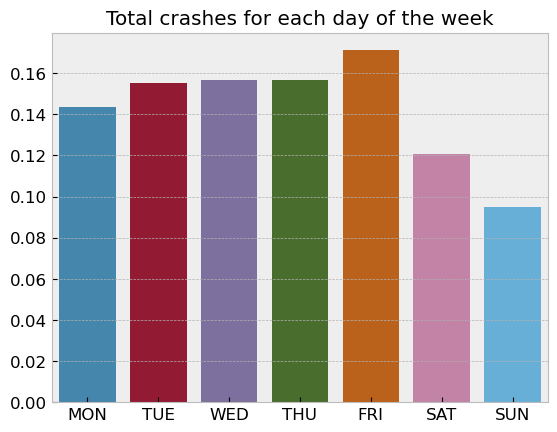

In [56]:
count = trafficCrashSample['CRASHDATE'].apply(lambda x: x.dayofweek).value_counts(normalize=True).sort_index()
count.index = ['MON','TUE','WED','THU','FRI','SAT','SUN']
f, ax = plt.subplots(1,1)
sns.barplot(x=count.index, y=count.values, ax=ax)
ax.set_title('Total crashes for each day of the week')

In [57]:
count_1 = trafficCrashSample['WEATHER'].value_counts(normalize=True)
count_2 = trafficCrashSample['GENDER'].value_counts(normalize=True)
count_3 = trafficCrashSample['ROADCONTOUR'].value_counts(normalize=True)
count_4 = trafficCrashSample['INJURIES'].value_counts(normalize=True)

Text(0.5, 1.0, 'Injuries')

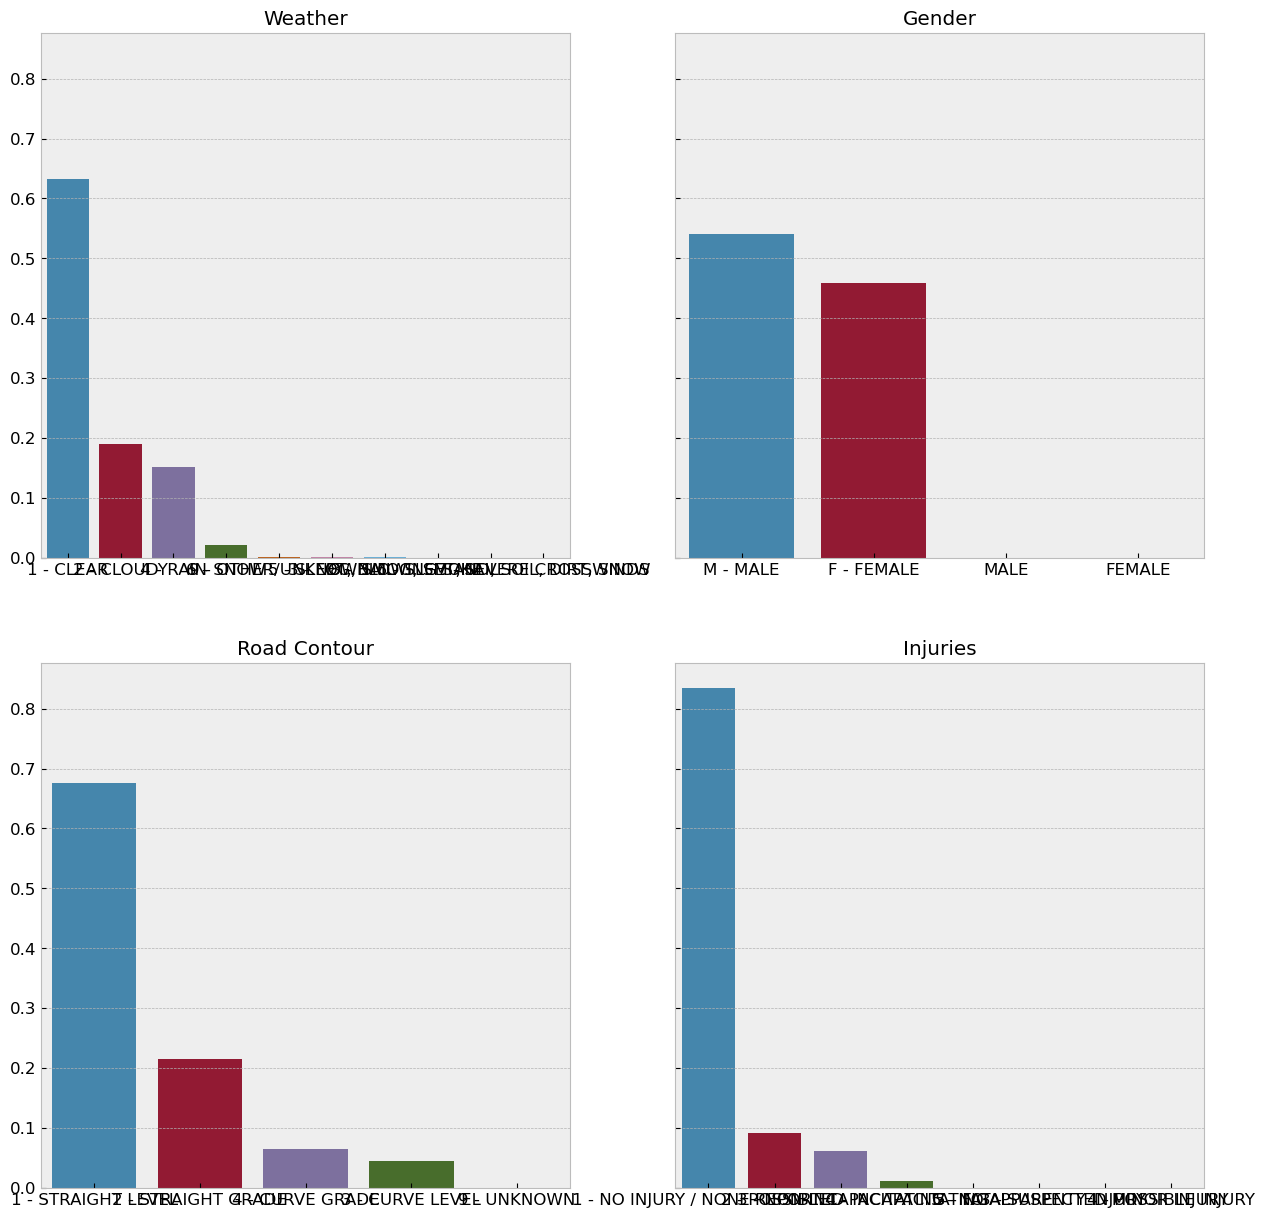

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
sns.barplot(x=count_1.index, y=count_1.values, ax=axes[0,0])
axes[0,0].set_title('Weather')
sns.barplot(x=count_2.index, y=count_2.values, ax=axes[0,1])
axes[0,1].set_title('Gender')
sns.barplot(x=count_3.index, y=count_3.values, ax=axes[1,0])
axes[1,0].set_title('Road Contour')
sns.barplot(x=count_4.index, y=count_4.values, ax=axes[1,1])
axes[1,1].set_title('Injuries')

In [59]:
import plotly.express as px


fig = px.scatter_mapbox(traffic, 
                        lat="LATITUDE_X", 
                        lon="LONGITUDE_X",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()



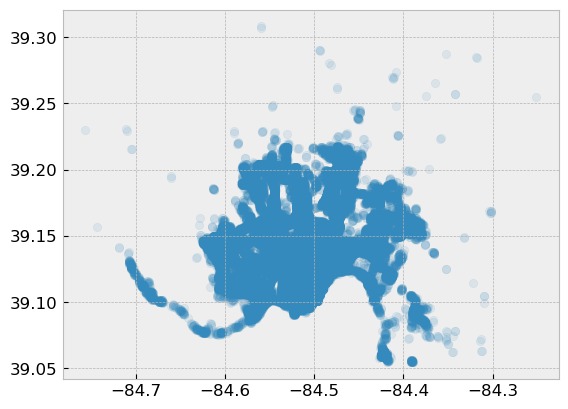

In [60]:
  
longitude_df=traffic['LONGITUDE_X']
latitude_df=traffic['LATITUDE_X']

plt.scatter(longitude_df, latitude_df,alpha=0.1)
plt.show()

In [61]:
# EDA
# Produce statistical summaries of the data.
# Analyze data distributions of the data.
# Analyze the correlations between the data features.
# Identifying data issues.
# identifying data types that need to be converted/transformed
# You'll need to provide a detailed write-up on every item above.

In [62]:
# Data Visualizations
# Create at least 4 visualizations
# Use at least 2 different visualizations libraries (of your choice)
# You'll need to provide a detailed write-up on the data visualization types selected and the insights it can present.

In [63]:
# Data Cleaning and Transformations
# Addressing missing values in the dataset
# Addressing duplicate values
# Addressing anomalies and Outliers
# Converting and Transforming Data types
# You'll need to provide a detailed write-up on the cleaning process.

In [64]:
# Machine Learning Plan
# What types of machine learning will you use in your project?
# What issues do you see in making that happen?
# What challenges will you potentially face?